# Model Visualization

### 1. Frame

Given the following characteristics of a diamond:  
```
carat	
cut	
color	
clarity	
depth	
table	
dimension
```

build a model to predict the price of the diamond

### 2. Acquire

The `plotnine` library has diamonds dataset. 

We will use that to build the model

In [36]:
import plotnine;

In [94]:
import pandas as pd;
import numpy as np;
%matplotlib inline

In [5]:
from plotnine.data import diamonds

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
type(diamonds)

pandas.core.frame.DataFrame

In [8]:
?diamonds

In [9]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

### 3. Refine

Let's see if there are any missing values in the dataset

In [40]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### 4. Transform

We see that some of the columns are categorical (cut, color, clarity).

Let's encode them using one-hot encoding technique

In [10]:
diamonds_encoded = pd.get_dummies(diamonds)

In [11]:
diamonds_encoded.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_SI2,clarity_SI1,clarity_VS2,clarity_VS1,clarity_VVS2,clarity_VVS1,clarity_IF
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,1,0,0,0,0,0,0


### 5. Explore

We did a fair amount of data exploration on this dataset earlier. We will skip this step for this notebook

### 6. Model

Let's build a simple linear regression model to predict price

In [41]:
# First, split the data into features and labels

In [42]:
data_columns = diamonds_encoded.columns
data_columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Very Good', 'cut_Premium', 'cut_Ideal', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_SI2', 'clarity_SI1', 'clarity_VS2',
       'clarity_VS1', 'clarity_VVS2', 'clarity_VVS1', 'clarity_IF'],
      dtype='object')

In [45]:
# train columns are the list of features
feature_columns = data_columns[data_columns != "price"]
feature_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Very Good', 'cut_Premium', 'cut_Ideal', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_SI2', 'clarity_SI1', 'clarity_VS2', 'clarity_VS1',
       'clarity_VVS2', 'clarity_VVS1', 'clarity_IF'],
      dtype='object')

In [46]:
# create features and label 
features = diamonds_encoded[train_columns].copy()
label = diamonds_encoded["price"].copy()

**Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression

In [22]:
?LinearRegression

In [48]:
# split into train and test.
# train is for building the model
# test is to measure the accuracy of the model

In [63]:
train_x = train.iloc[:40000].copy().as_matrix()
train_y = label.iloc[:40000].copy().as_matrix()
test_x = train.iloc[40000:].copy().as_matrix()
test_y = label.iloc[40000:].copy().as_matrix()

In [64]:
# instantiate the model
model1 = LinearRegression()

In [74]:
# fit the model
model1.fit(train_x, train_y);

In [75]:
# use the model to predict prices for the test dataset
prediction1 = model1.predict(test_x)

In [76]:
prediction1

array([ 1303.5,  1377. ,  1400. , ...,  3130.5,  2389.5,  2754.5])

In [77]:
# create a dataframe combining actual and predicted for the test dataset
test_consolidated = pd.DataFrame({"actual": test_y, "predicted": prediction1})

In [78]:
test_consolidated.head()

,actual,predicted
0,1107,1303.5
1,1107,1377.0
2,1107,1400.0
3,1107,1193.5
4,1107,1203.5


In [70]:
# what is the RMSE of the model?
np.sqrt(np.mean((test_consolidated.actual - test_consolidated.predicted)**2))

855.25889063741818

We need to add visualization to understand the model fitting process !

Let's use `yellowbricks` to visualize the prediction accuracy and error


In [111]:
# We will use yellowbricks to visualize the prediction error/accuracy
from yellowbrick.regressor.residuals import PredictionError, ResidualsPlot

**Predicted Vs Actual**

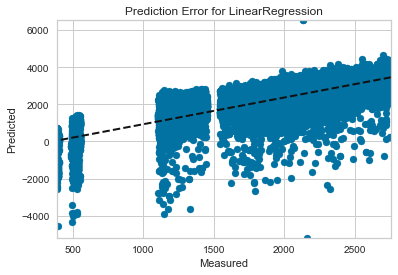

In [110]:
model2 = LinearRegression()
visualizer = PredictionError(model2)
visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

**Residual Plots**

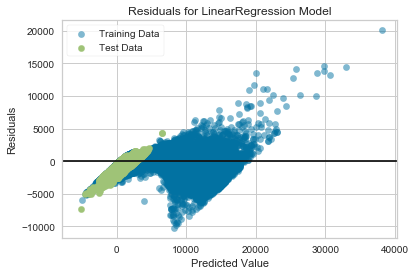

In [112]:
model2 = LinearRegression()
visualizer = ResidualsPlot(model2)
visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

**Feature Importance**

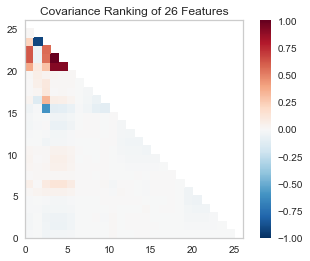

In [120]:
from yellowbrick.features.rankd import Rank2D
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=feature_columns.values, algorithm='covariance')

visualizer.fit(train_x, train_y)          # Fit the data to the visualizer
visualizer.transform(train_x)             # Transform the data
visualizer.poof()   

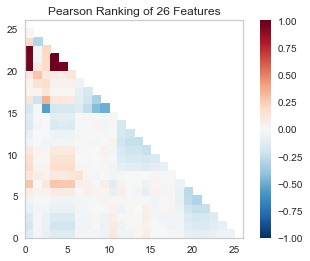

In [121]:
#Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_columns.values, algorithm='pearson')

visualizer.fit(train_x, train_y)          # Fit the data to the visualizer
visualizer.transform(train_x)             # Transform the data
visualizer.poof()   